# Exam Data Science 1 (2020 - 2021)

## General Information

Data source:
https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

# ***Personal Information***

First name: Kevin

Last name: Jacobs

Student number: 0805963

#### ***Imports***

In [80]:
# put all your library imports here
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from random import randrange
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier

#### ***Data Assignment***

You need only use a selection of the original dataset. The variables have been grouped into several groups. You will use the *Basic* Group along with 2 other groups to predict G3.
Each group has been given a number.

The following script will assign you the numbers of the groups you will need to use in the assignment. Replace my personel number with your student number, and run the script **once**. After you have run the script, paste a screenshot below. This is of utmost importance, as the data assignment script uses random numbers.

Variable to predict:
+ G3

Basic:
+ school
+ sex
+ age
+ address
+ famsize

[1] Parents:
+ Medu
+ Fedu
+ Mjob
+ Fjob

[2] Surrounding: 
+ reason
+ nursery
+ internet

[3] Extra:
+ freetime
+ guardian
+ traveltime
+ studytime
+ failures

[4] Support:
+ schoolsup
+ famsup
+ paid

[5] Extra curricular:
+ activities
+ higher
+ romantic
+ famrel

[6] Relaxation:
+ goout
+ Dalc
+ Walc

[7] Health:
+ health
+ absences


In [6]:
studentnumber = "r0805963"

def stdnr_splitter(studentnumber):
	# decompose student number into interesting 
	cons_array = np.array(list(studentnumber))[2:].astype(int)
	indices = np.unique(cons_array)
	sum = round(np.sum(cons_array)/6)+1
	random = randrange(7)+1
	# interaction terms
	var1_index = int(round((sum*random)/7)+1)
	# quadratic terms
	var2a_index = int(round((sum/random)))
	var2b_index = int(round((randrange(10)+1)%var2a_index))
	print(f"Your groups are: {var1_index} and {var2a_index}")

stdnr_splitter(studentnumber)

Your groups are: 4 and 2



![data assignment screenshot](screenshot.png "Data Assignment")


## Assignment

### Question 1: General

Welcome to the Data Science Fundamentals exam!

#### Question 1a

In this take-home exam, you will try and apply everything you have learned this semester to 1 dataset. The dataset you will be working with, is . As very first assignment, you load in the dataset here, and divide it over 2 dataframes: *X_df* and *Y_df*. The former should contain all the independent variables present in the dataset, while the latter contains all the dependent variables. 
Do so here:


In [4]:
# import data and divide over dataframes
dfX = pd.read_csv('student.csv', usecols=['internet', 'reason', 'nursery'])
dfY = pd.read_csv('student.csv', usecols=['schoolsup.y', 'famsup.y', 'paid.y'])
dfYInt = dfY
dfYInt = dfYInt.replace('yes',1,regex=True)
dfYInt = dfYInt.replace('no',0,regex=True)
dfXInt = dfX
dfXInt = dfXInt.replace('yes',1,regex=True)
dfXInt = dfXInt.replace('no',0,regex=True)
dfXInt = dfXInt.replace('home',2,regex=True)
dfXInt = dfXInt.replace('reputation',3,regex=True)
dfXInt = dfXInt.replace('course',4,regex=True)
dfXInt = dfXInt.replace('other',5,regex=True)



print(dfXInt)
print(dfYInt)

# 2 dataframes

     reason  nursery  internet
0         2        1         1
1         3        0         1
2         3        1         0
3         4        1         1
4         3        1         1
..      ...      ...       ...
377       4        1         1
378       5        1         1
379       2        1         1
380       2        1         1
381       5        1         0

[382 rows x 3 columns]
     schoolsup.y  famsup.y  paid.y
0              1         1       1
1              1         1       0
2              1         1       0
3              1         1       0
4              0         1       1
..           ...       ...     ...
377            0         0       0
378            0         0       0
379            0         1       0
380            0         0       0
381            0         0       0

[382 rows x 3 columns]


explain what you have done and why here
I created 2 different datasets and printed them out. I also Converted them to numbers so that I can do the quadratic term and the interaction term

#### Question 1b

**You are not permitted to use all variables in your analysis**.
Using the *Data Assignment* script above, you will receive the variables you are allowed to use.
Before you go any further, you should take a look at the variables that have been assigned to you. For these variables, you will add 1 quadratic term and 1 interaction term.

A Quadratic Term is a transformation of an existing variable. Let's say I have variable $x$ in my dataset, the quadratic term would then be $x^2$. Make the quadratic term that is asked from you by the *Data Assignment* script, and add it to the dataframe containing your independent variables. Note: when you add a quadratic term of a variable which is not yet in your dataframe, you also need to add the underlying variable to your dataframe! Otherwise, your analyses will not make any sense.

An Interaction Term is the multiplication of two existing terms. Let's say I have variables $x$ and $y$ in my dataset, the interaction term would then be $x*y$. Note: the same remark as with the quadratic term holds. The original terms also need to be present in your dataframe. If they are not in there yet, please add them!


Make a new dataframe, called *X_df_complete* in which you select the relevant dependent variables and add the Quadratic and Interaction Term. Do so here:

In [5]:
# make complete dataframe
# SELECT VARIABLES
# CREATE ARTIFICIAL VARIABLES
# INTERACTION TERM -> if there is an interaction between te variables
# NEW VAR = WACL * ABSENCES
dfXComplete = 3
dfXComplete
# QUADRIC TERM -> TAKE A LOOK AT POLYNOMIAL REGRESSION
# NEW VAR = WALC ^ 2
yOne = dfYInt['schoolsup.y']^2
yTwo = dfYInt['famsup.y']^2
yThree = dfYInt['paid.y']^2


#### Question 1c

What does the Interaction Term and the Quadratic Term signify? Investigate, illustrate with graphs, and report below:

In [6]:
## code exploring the interaction term

explanation and interpretation of the interaction term goes here


In [7]:
## code exploring the quadratic term

explanation and interpretation of the quadratic term goes here


#### Question 1d

Form your training and test set. Explain why you do this.

In [8]:
## code making the training and test set

explanation on training and test set goes here

# *Intermezzo*

Note the nice formatting we have used in Question 1. It is expected of you to do the same for Questions 2-5. Because I do not know exactly what you will do in each of these questions, I have not provided a blueprint of the solutions formatting.

### Question 2: Regression

You will note that the dependent variable is continuous. Perform a regression analysis. (Also experiment with the interaction & quadratic terms, and report on what happens). Be complete!

### Training my data

In [121]:
x = dfXInt
y = dfY['famsup.y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

y1 = dfY['paid.y']
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y1, test_size=0.25, random_state=0)

y2 = dfY['schoolsup.y']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.25, random_state=0)



### Linear Regression

Intercept (Beta 0): [0.14919012 0.60129892 0.06205032]
Slope (Beta 1): [-0.00793605  0.04013015 -0.02950162]


Text(0, 0.5, 'Y')

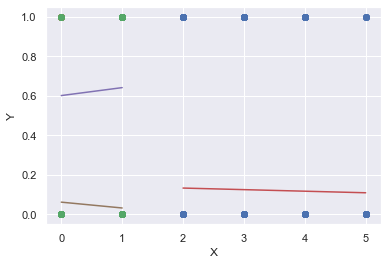

In [126]:
regressor = LinearRegression()
regressor.fit(dfXInt, dfYInt)
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))

min_pt = dfXInt.min() * regressor.coef_[0] + regressor.intercept_
max_pt = dfXInt.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(dfXInt, dfYInt, 'o')
plt.plot([dfXInt.min(), dfXInt.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")

#### Paid Linear Regression

Intercept (Beta 0): 0.062050324781806
Slope (Beta 1): -0.006618729403786205


Text(0, 0.5, 'Y')

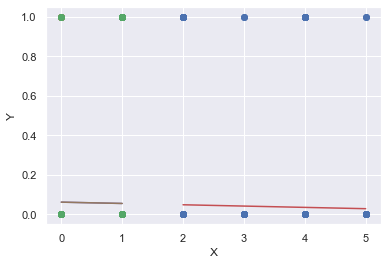

In [115]:
regressor = LinearRegression()
regressor.fit(dfXInt, dfYInt['paid.y'])
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))

min_pt = dfXInt.min() * regressor.coef_[0] + regressor.intercept_
max_pt = dfXInt.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(dfXInt, dfYInt['paid.y'], 'o')
plt.plot([dfXInt.min(), dfXInt.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")

#### Famsup Linear Regression

Intercept (Beta 0): 0.6012989205942216
Slope (Beta 1): -0.035611679629071795


Text(0, 0.5, 'Y')

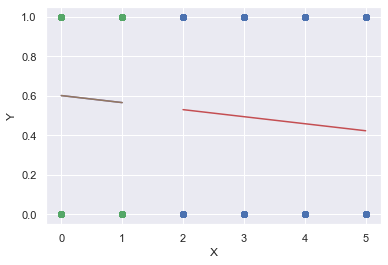

In [125]:
regressor = LinearRegression()
regressor.fit(dfXInt, dfYInt['famsup.y'])
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))

min_pt = dfXInt.min() * regressor.coef_[0] + regressor.intercept_
max_pt = dfXInt.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(dfXInt, dfYInt['famsup.y'], 'o')
plt.plot([dfXInt.min(), dfXInt.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")

#### paid Linear Regression

Intercept (Beta 0): 0.062050324781806
Slope (Beta 1): -0.006618729403786205


Text(0, 0.5, 'Y')

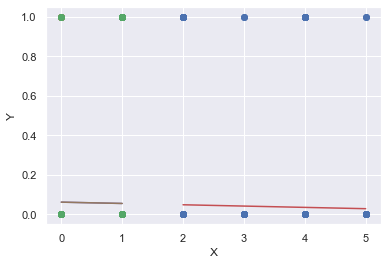

In [124]:
regressor = LinearRegression()
regressor.fit(dfXInt, dfYInt['paid.y'])
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))

min_pt = dfXInt.min() * regressor.coef_[0] + regressor.intercept_
max_pt = dfXInt.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(dfXInt, dfYInt['paid.y'], 'o')
plt.plot([dfXInt.min(), dfXInt.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")

### Polynomnial Regression

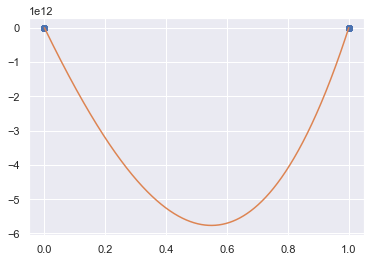

In [145]:
x = dfXInt['nursery'].values.reshape(-1,1)
y = dfYInt['schoolsup.y'].values.reshape(-1,1)

model = LinearRegression()
pol_0 = PolynomialFeatures(degree=3)

model.fit(pol_0.fit_transform(x), y)
x1 = np.linspace(x.min(), x.max(), 10000).reshape(-1,1) 
plt.plot(x, y, 'o')
plt.plot(x1, model.predict(pol_0.fit_transform(x1))) 
plt.show()

### Review
##### So there are a few problems with my regression, There are a lot of yes and no answers. Which can be bios in my final regression. It does give me a high percentage regression on all the Y  predictions accept famsup where we have a 0.59, It still is enough to be confident in making a final thoughts.


### Question 3: Classification

Though we know that the dependent variable is continuous, this does not by any means mean that we can't perform a classification analysis. Encode the dependent variables into several categories you find logical (report which ones and why), and perform a classification analysis on this encoded variable. (Once again, don't be too fast to omit the interaction & quadratic terms). Be complete!

### Logistic Regression

In [128]:
#Famsup
logreg = LogisticRegression(multi_class='auto', max_iter=100000,solver='lbfgs') 
logreg.fit(X_train,y_train)
score = logreg.score(X_test,y_test)
print("Famsup: ",score)
scaler = StandardScaler()

# paid
logreg1 = LogisticRegression(multi_class='auto', max_iter=100000,solver='lbfgs') 
logreg1.fit(X_train1,y_train1)
score1 = logreg1.score(X_test1,y_test1)
print("Paid: ",score1)
scaler1 = StandardScaler()

# schoolsup
logreg2 = LogisticRegression(multi_class='auto', max_iter=100000,solver='lbfgs') 
logreg2.fit(X_train2,y_train2)
score2 = logreg2.score(X_test2,y_test2)
print("Schoolsup: ",score2)
scaler2 = StandardScaler()

Famsup:  0.59375
Paid:  0.9479166666666666
Schoolsup:  0.8333333333333334


### Heat map & precision & Metrics

Famsup:
              precision    recall  f1-score   support

          no       1.00      0.03      0.05        40
         yes       0.59      1.00      0.74        56

    accuracy                           0.59        96
   macro avg       0.79      0.51      0.40        96
weighted avg       0.76      0.59      0.45        96

Metrics
[[ 1 39]
 [ 0 56]]


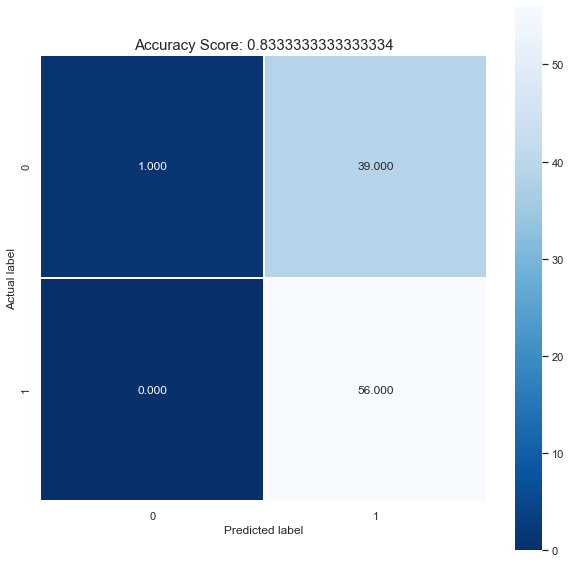

In [178]:
print("Famsup:")
predictionsL = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictionsL)
print(classification_report(y_test, predictionsL))
print("Metrics")
print(cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


#### Matrix 2

Paid:
              precision    recall  f1-score   support

          no       0.95      1.00      0.97        91
         yes       0.00      0.00      0.00         5

    accuracy                           0.95        96
   macro avg       0.47      0.50      0.49        96
weighted avg       0.90      0.95      0.92        96

Metrics 2
[[91  0]
 [ 5  0]]


c:\users\kevin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



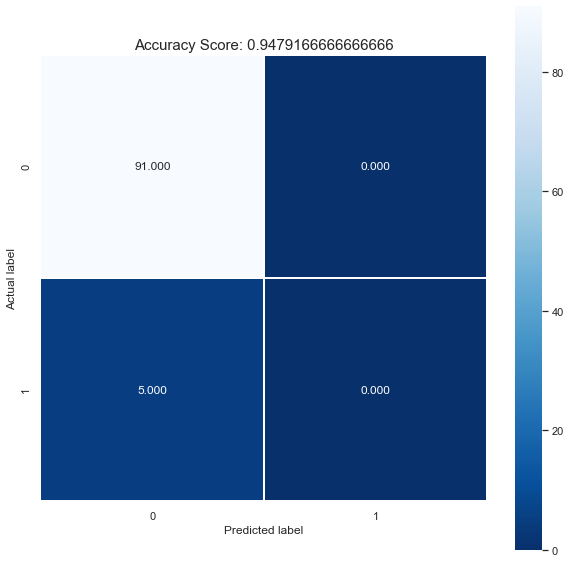

In [179]:
print("Paid:")
predictionsL1 = logreg1.predict(X_test1)
cm1 = metrics.confusion_matrix(y_test1, predictionsL1)
print(classification_report(y_test1, predictionsL1))
print("Metrics 2")
print(cm1)

plt.figure(figsize=(10,10))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);


#### Matrix 3

Schoolsup:
              precision    recall  f1-score   support

          no       0.83      1.00      0.91        80
         yes       0.00      0.00      0.00        16

    accuracy                           0.83        96
   macro avg       0.42      0.50      0.45        96
weighted avg       0.69      0.83      0.76        96

Metrics 3
[[80  0]
 [16  0]]


c:\users\kevin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



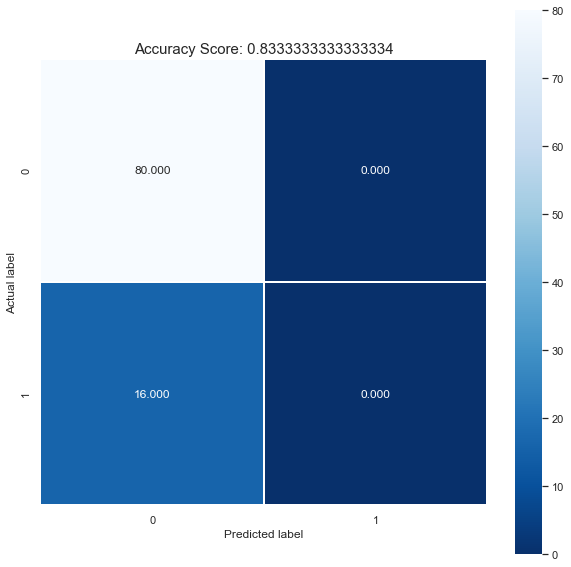

In [180]:
print("Schoolsup:")
predictionsL2 = logreg2.predict(X_test2)
cm2 = metrics.confusion_matrix(y_test2, predictionsL2)
print(classification_report(y_test2, predictionsL2))
print("Metrics 3")
print(cm2)


plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);


### making kmeans/ clusters

In [105]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(dfXInt)
kmeans.cluster_centers_.shape

(10, 3)

### Predictions

In [30]:
labels = np.zeros_like(clusters)
labels2 = np.zeros_like(clusters)
labels3 = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(dfYInt['paid.y'])[0]
    
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels2[mask] = mode(dfYInt['famsup.y'])[0]
    
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels3[mask] = mode(dfYInt['schoolsup.y'])[0]

print("paid: ", accuracy_score(dfYInt['paid.y'], labels))
print("Famsup: ",accuracy_score(dfYInt['famsup.y'], labels))
print("SchoolSup: ",accuracy_score(dfYInt['schoolsup.y'], labels))


paid:  0.9319371727748691
Famsup:  0.3743455497382199
SchoolSup:  0.8691099476439791


### Heat map

#### matrix 1

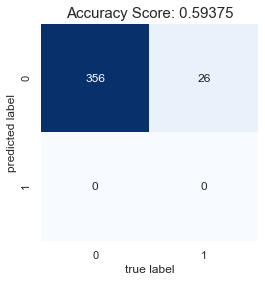

In [34]:
mat = metrics.confusion_matrix(dfYInt['paid.y'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Matrix 2

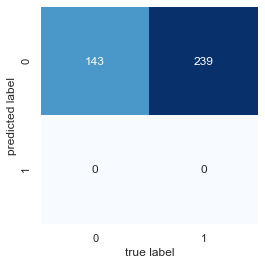

In [35]:
mat2 = metrics.confusion_matrix(dfYInt['famsup.y'], labels)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Matrix 3

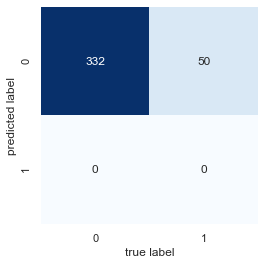

In [36]:
mat3 = metrics.confusion_matrix(dfYInt['schoolsup.y'], labels)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

### Decision Tree

#### famsup

In [197]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train, y_train)
#Predictions
predictions = tree.predict(X_test)
#print(predictions) # only one with yes and no's

score = tree_fit.score(X_test, y_test)
print('score ',score)

print(classification_report(y_test, predictions))

score  0.5729166666666666
              precision    recall  f1-score   support

          no       0.44      0.10      0.16        40
         yes       0.59      0.91      0.71        56

    accuracy                           0.57        96
   macro avg       0.52      0.51      0.44        96
weighted avg       0.53      0.57      0.48        96



#### Confusion matrix

[[ 3 -3]
 [ 5 -5]]


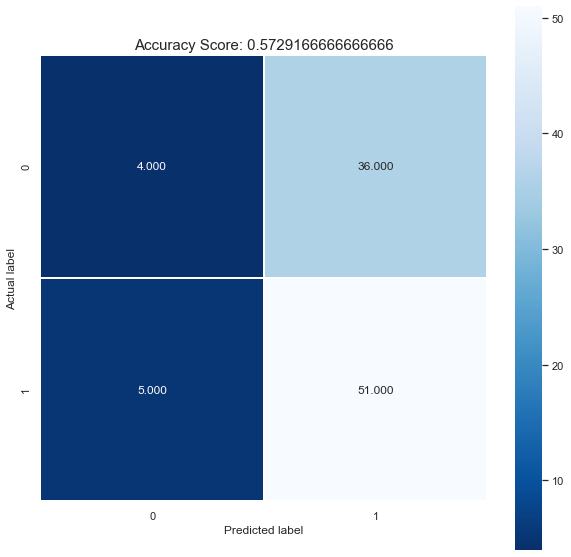

In [198]:
cm = metrics.confusion_matrix(y_test, predictions)
#print(cm)
cm2 = metrics.confusion_matrix(y_test, predictionsL)
print(cm - cm2)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### paid

In [199]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train1, y_train1)
#Predictions
predictions = tree.predict(X_test1)
#print(predictions)

score = tree_fit.score(X_test1, y_test1)
print('score ',score)

print(classification_report(y_test, predictions))

score  0.9479166666666666
              precision    recall  f1-score   support

          no       0.42      1.00      0.59        40
         yes       0.00      0.00      0.00        56

    accuracy                           0.42        96
   macro avg       0.21      0.50      0.29        96
weighted avg       0.17      0.42      0.25        96



c:\users\kevin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Confusion matrix

[[0 0]
 [0 0]]


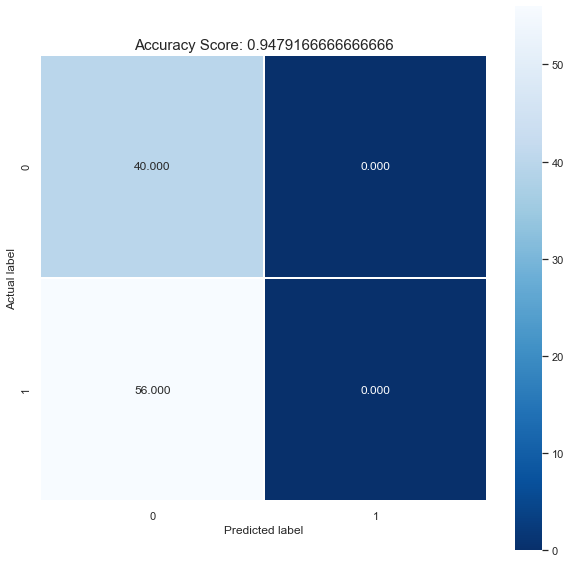

In [200]:
cm = metrics.confusion_matrix(y_test, predictions1)
#print(cm)
cm2 = metrics.confusion_matrix(y_test, predictionsL1)
print(cm - cm2)


plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Schoolsup

In [204]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train2, y_train2)
#Predictions
predictions = tree.predict(X_test2)
#print(predictions)

score = tree_fit.score(X_test2, y_test2)
print('score ',score)

print(classification_report(y_test, predictions))

score  0.8333333333333334
              precision    recall  f1-score   support

          no       0.42      1.00      0.59        40
         yes       0.00      0.00      0.00        56

    accuracy                           0.42        96
   macro avg       0.21      0.50      0.29        96
weighted avg       0.17      0.42      0.25        96



c:\users\kevin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Confusion matrix

[[0 0]
 [0 0]]


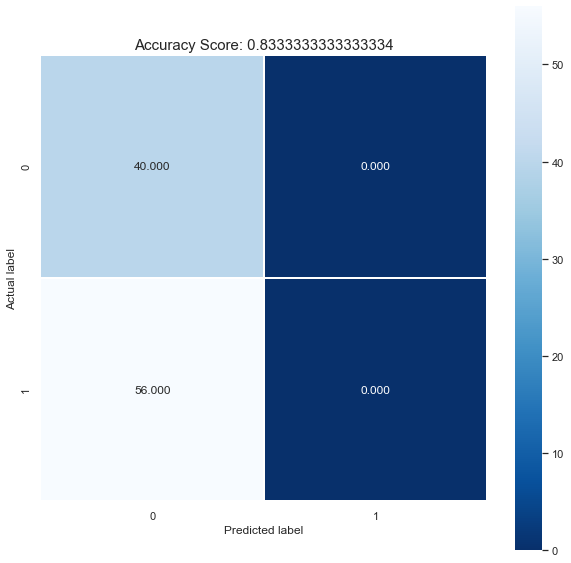

In [205]:
cm = metrics.confusion_matrix(y_test, predictions2)
#print(cm)
cm2 = metrics.confusion_matrix(y_test, predictionsL2)
print(cm - cm2)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Review
##### Here we can see 3 different outcomes. We have  93% certainty, 87% and a 37%. We can obvious preditct the paid.y and the schoolsup.y with convident. Hower Famsup is dangling down with a 37% chance of predictions. That's not very high if you compare it to the others.   If we take a look back at the regression we can see that Famsup was also the lowest prediction out of the 3. But stlil higher then 37%

In [192]:
# go go go go go!

### Question 4: Clustering

Now we have analysed the dataset in a supervised manner, let's try and investigate whether this supervised dimension indeed offers additional information. Perform a cluster analysis on the dependent variables, and compare your predictive power with the models you have made in Question 2 and 3. Be complete!

### Dendrogram clusters

array([0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0,
       0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0,

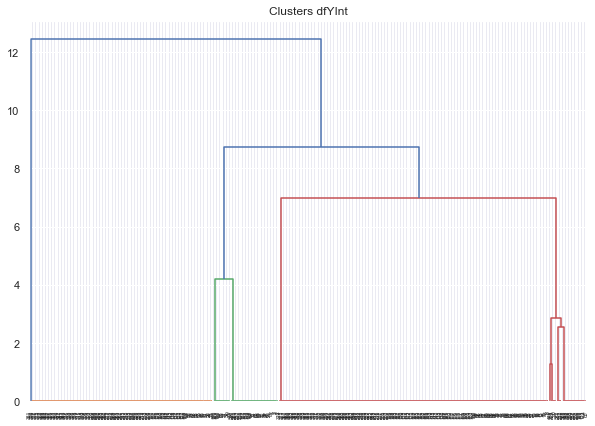

In [62]:
plt.figure(figsize=(10,7))
plt.title("Clusters dfYInt")
dend = shc.dendrogram(shc.linkage(dfYInt, method='ward'))

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dfYInt)


### Elbow K nearest neighbour

Famsup:  0.5
paid:  0.9479166666666666
schoolsup:  0.8333333333333334


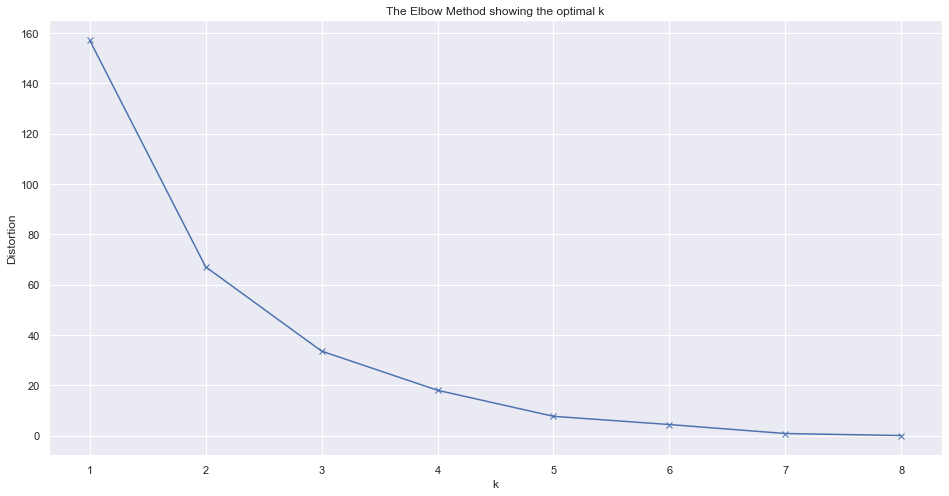

In [102]:
distortions = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfYInt)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Predictions

In [103]:
#X_train, X_test, y_train, y_test
neigh = KNeighborsClassifier(n_neighbors=4)# 9
neigh.fit(X_train, y_train)
neigh.predict(X_test[0:10])
predictions = neigh.predict(X_test)
score = neigh.score(X_test,y_test)
print("Famsup: ",score)

#X_train, X_test, y_train, y_test
neigh = KNeighborsClassifier(n_neighbors=4)# 9
neigh.fit(X_train1, y_train1)
neigh.predict(X_test1[0:10])
predictions = neigh.predict(X_test1)
score = neigh.score(X_test1,y_test1)
print("paid: ",score)

#X_train, X_test, y_train, y_test
neigh = KNeighborsClassifier(n_neighbors=4)# 9
neigh.fit(X_train2, y_train2)
neigh.predict(X_test2[0:10])
predictions = neigh.predict(X_test2)
score = neigh.score(X_test2,y_test2)
print("schoolsup: ",score)

Famsup:  0.5
paid:  0.9479166666666666
schoolsup:  0.8333333333333334


### Review
##### Again we see here that Famsup is lower than the rest and paid is the highest out of all three. The prediction is 50% for Famsup and paid rocks a 94%. We can also see the kink in the elbow methode at x2. so that's also a good sign.

In [ ]:
# in the home stretch!

### Question 5: Conclusion

As always: report, conclude, illustrate.

##### I think it's safe to say that Paid is the most interesting to watch. We have mostly 90% certainty with almost all the tests. Famsup is somewhat not trusty always around 50% we try to aim at a minimum of 60-70 so that we are almost always correct. I also discoverd that most answers are No(0) this has made an impact on our study for sure.

In [ ]:
# now onto the next exam! ;-)